In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.11.15']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
995,Afghanistan,22.11.15,204724
2002,Africa,22.11.15,12403471
2997,Albania,22.11.15,333197
3992,Algeria,22.11.15,270969
4981,Andorra,22.11.15,46664
...,...,...,...
231271,Wallis and Futuna,22.11.15,3415
232301,World,22.11.15,635807282
233251,Yemen,22.11.15,11945
234224,Zambia,22.11.15,333685


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
995,Afghanistan,22.11.15,204724
2997,Albania,22.11.15,333197
3992,Algeria,22.11.15,270969
4981,Andorra,22.11.15,46664
5952,Angola,22.11.15,103131
...,...,...,...
229552,Vietnam,22.11.15,11509473
231271,Wallis and Futuna,22.11.15,3415
233251,Yemen,22.11.15,11945
234224,Zambia,22.11.15,333685


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
222025,United States,22.11.15,98086072
96842,India,22.11.15,44667900
74694,France,22.11.15,37245602
79641,Germany,22.11.15,36119184
29692,Brazil,22.11.15,34908198
197022,South Korea,22.11.15,26357464
220996,United Kingdom,22.11.15,23954196
104823,Italy,22.11.15,23823192
106832,Japan,22.11.15,23241410
174452,Russia,22.11.15,21203361


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
214910,Turkey,22.11.15,16919638
198996,Spain,22.11.15,13551539
159818,Oceania,22.11.15,12778625
229552,Vietnam,22.11.15,11509473
12992,Australia,22.11.15,10490669
...,...,...,...
216995,Tuvalu,22.11.15,1259
125728,Macao,22.11.15,795
98844,International,22.11.15,721
227547,Vatican,22.11.15,29


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.11.15', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_2340\2402767669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.11.15', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.11.15,98086072
India,22.11.15,44667900
France,22.11.15,37245602
Germany,22.11.15,36119184
Brazil,22.11.15,34908198
South Korea,22.11.15,26357464
United Kingdom,22.11.15,23954196
Italy,22.11.15,23823192
Japan,22.11.15,23241410


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.11.15,98086072
1,India,22.11.15,44667900
2,France,22.11.15,37245602
3,Germany,22.11.15,36119184
4,Brazil,22.11.15,34908198
5,South Korea,22.11.15,26357464
6,United Kingdom,22.11.15,23954196
7,Italy,22.11.15,23823192
8,Japan,22.11.15,23241410
9,Russia,22.11.15,21203361


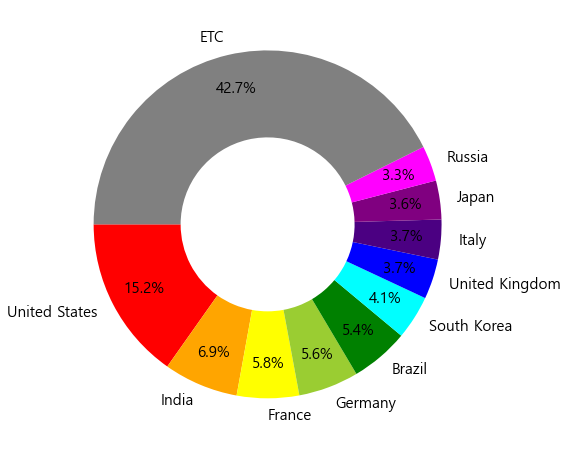

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()